## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.
- 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
delivery_time_df=pd.read_csv('delivery_time.csv')

In [3]:
delivery_time_df.head()#viewing top 5 records of Dataframe

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery_time_df.describe().transpose()#Describing the Dataframe to get aggregate

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [5]:
delivery_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#EDA
#renaming the columns
delivery_time_df.rename({'Delivery Time': 'Delivery_Time','Sorting Time': 'Sorting_Time'}, axis=1,inplace=True)

In [7]:
#checking for duplicates
delivery_time_df[delivery_time_df.duplicated()].shape

(0, 2)

In [8]:
#Print the duplicated rows
delivery_time_df[delivery_time_df.duplicated()]

,Delivery_Time,Sorting_Time


In [9]:
delivery_time_df['Sorting_Time']=delivery_time_df['Sorting_Time'].astype('float64')

In [10]:
delivery_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [11]:
delivery_time_df.head()

,Delivery_Time,Sorting_Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0


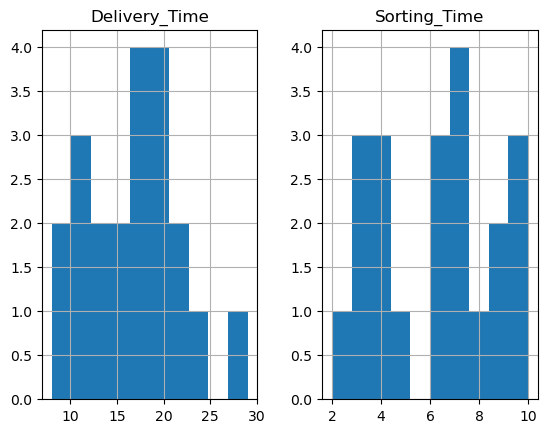

In [12]:
#Checking for Outliers
delivery_time_df.hist()
plt.show()

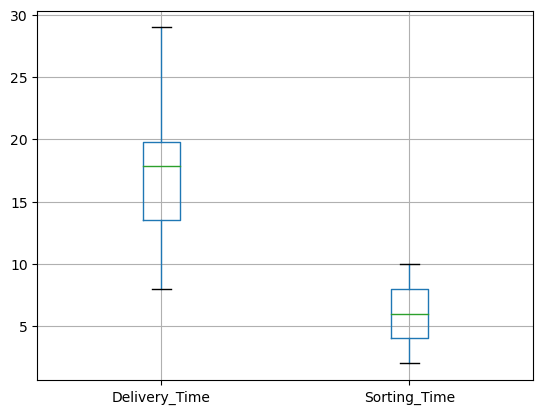

In [13]:
delivery_time_df.boxplot()
plt.show()#No Outliers

## Step 1 : Is there a connection between x and y?

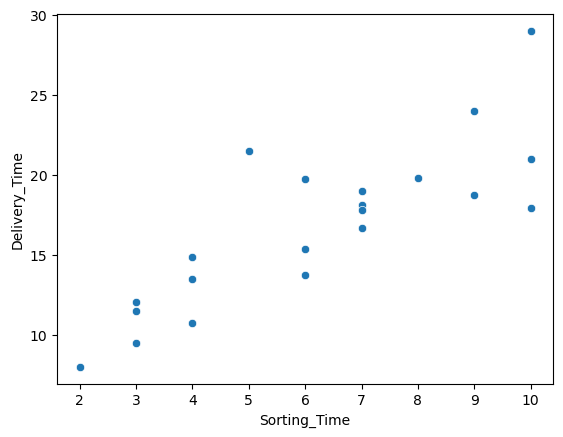

In [14]:
sb.scatterplot(y=delivery_time_df['Delivery_Time'] ,x=delivery_time_df['Sorting_Time'])
plt.show()

## Step 2: is the relationship linear? - we can find this out using pearson's correlation coffiecient

In [15]:
delivery_time_df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Step 3 : Train the model

In [16]:
delivery_time_model = ols('Delivery_Time~Sorting_Time',data=delivery_time_df).fit()

In [17]:
delivery_time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        14:03:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
delivery_time_model.params # Model Parameters : B0 and B1

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [19]:
(delivery_time_model.rsquared,delivery_time_model.rsquared_adj) # R-squared values

(0.6822714748417231, 0.6655489208860244)

## Step 4 : Find Residuals

In [20]:
model_resid = delivery_time_model.resid

In [21]:
def squared_errors(x):
    return x**2

In [22]:
SSE_df=squared_errors(model_resid)
SSE_delivery_time_model=SSE_df.sum()# Sum of Squared errors
SSE_delivery_time_model

163.6595425202653

In [23]:
MSE_delivery_time_model = SSE_delivery_time_model/model_resid.count()
MSE_delivery_time_model

7.793311548584062

In [24]:
RSME_delivery_time_model = np.sqrt(MSE_delivery_time_model)
RSME_delivery_time_model

2.7916503270617654

# Residual Analysis

## Mean should be equal to 0

In [25]:
model_resid.mean()

-6.259543148362787e-15

## Constant Variance

In [26]:
def standardize(x):
    return (x-x.mean())/x.std()

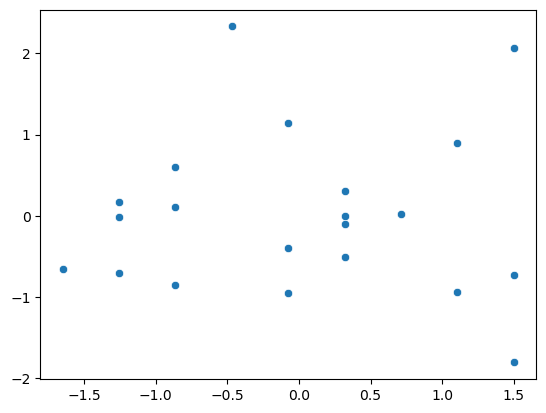

In [27]:
sb.scatterplot(y=standardize(model_resid),x=standardize(delivery_time_model.fittedvalues))
plt.show()

In [28]:
# No Co-variance
pd.concat([pd.DataFrame(standardize(model_resid),columns=['Residue']),pd.DataFrame(standardize(delivery_time_model.fittedvalues),columns=['y_cap_values'])],axis=1).corr()

,Residue,y_cap_values
Residue,1.000000e+00,-3.885781e-16
y_cap_values,-3.885781e-16,1.000000e+00


## Check if residual follow normal distribution

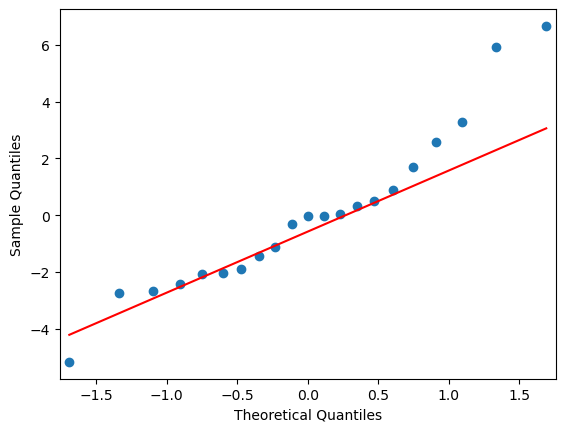

In [29]:
import statsmodels.api as sm
sm.qqplot(model_resid,line='q')
plt.show()

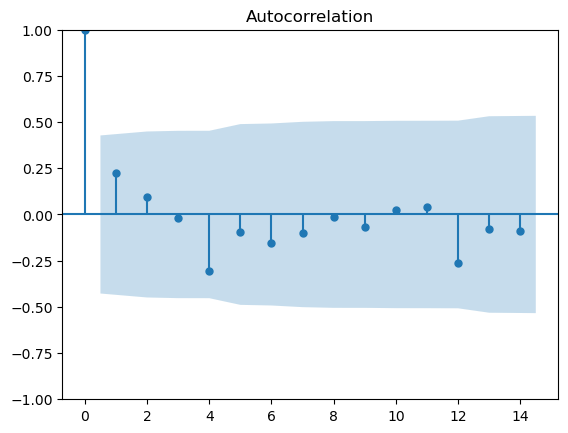

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_resid)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

In [31]:
model_influence = delivery_time_model.get_influence()

In [32]:
(c,_)=model_influence.cooks_distance

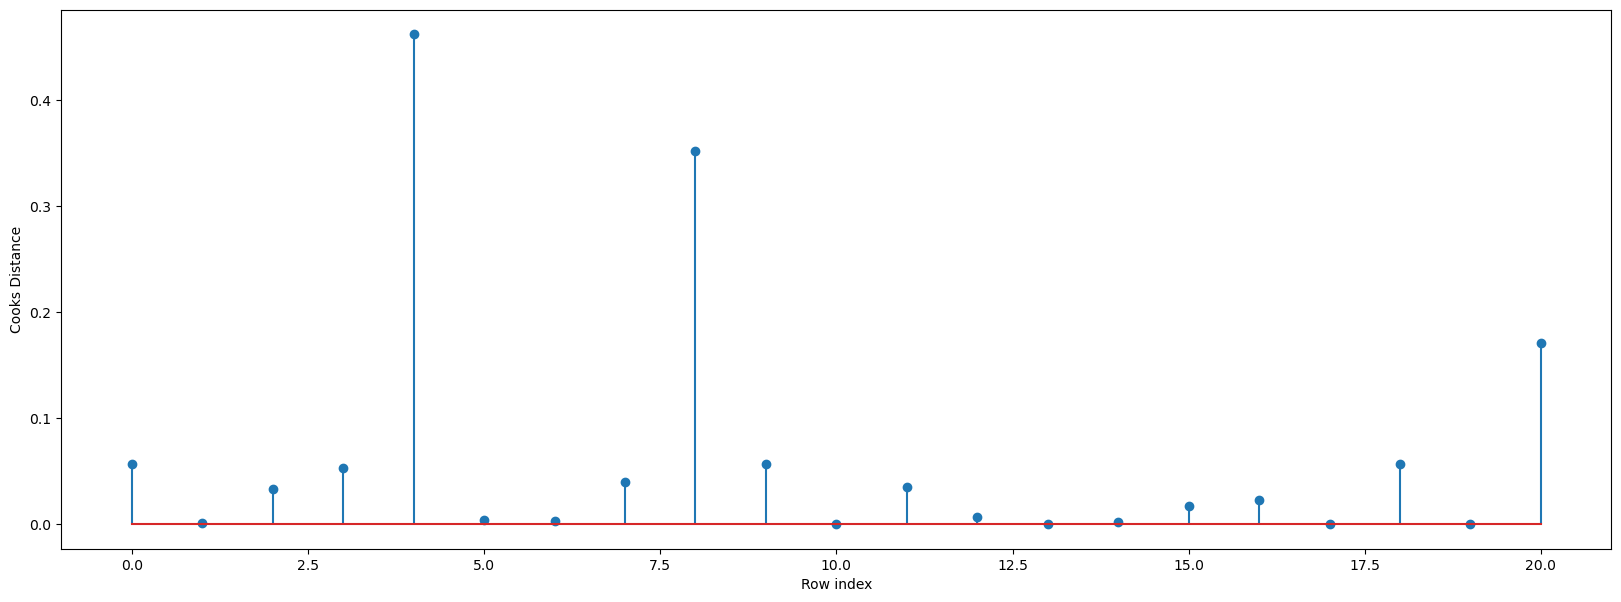

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(delivery_time_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(4, 0.462053041265031)

## High Influence points

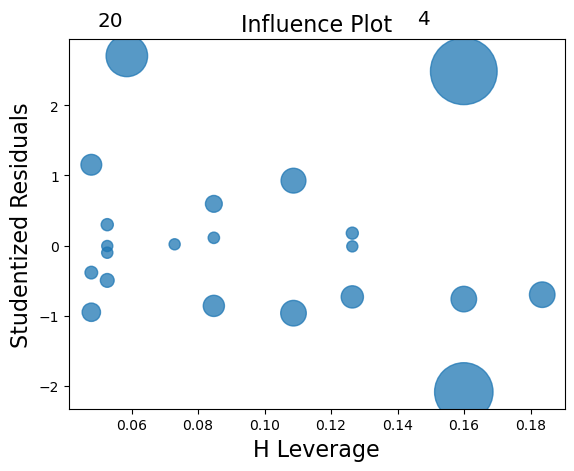

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(delivery_time_model)
plt.show()

In [36]:
k = delivery_time_df.shape[1]
n = delivery_time_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42857142857142855

#### From the above plot, it is evident that all data points are with-in leverage cut-off , hence there is no influencers outliers

In [37]:
unseen = pd.DataFrame({'Sorting_Time':[2.3,3.45,5.4,7.8,10]})

In [38]:
delivery_time_model.predict(unseen)

0    10.375480
1    12.271853
2    15.487441
3    19.445089
4    23.072933
dtype: float64

In [39]:
pd.concat([unseen,pd.DataFrame(delivery_time_model.predict(unseen)).rename({0:'y_predicted'},axis=1)],axis=1)

,Sorting_Time,y_predicted
0,2.30,10.375480
1,3.45,12.271853
2,5.40,15.487441
3,7.80,19.445089
4,10.00,23.072933
